In [1]:
import soundspeed as ss
import matplotlib.pyplot as plt
import numpy as np
import csv

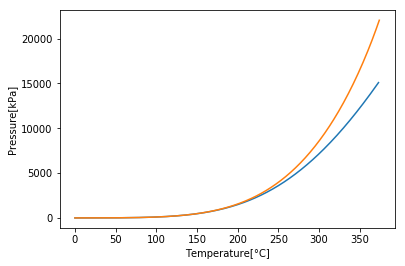

In [2]:
nbsnrcsteamtab = np.loadtxt('NBSNRCSteamTables1984.txt', delimiter='\t')
temp = np.arange(ss.watertriplepointtemp-273.15, ss.watercriticalpointtemp-273.15, 1)
plt.plot(temp, ss.saturated_vapour_pressure(temp)/1000)
plt.plot(nbsnrcsteamtab[:,0], nbsnrcsteamtab[:,1])
plt.xlabel('Temperature[°C]')
plt.ylabel('Pressure[kPa]')
plt.show()

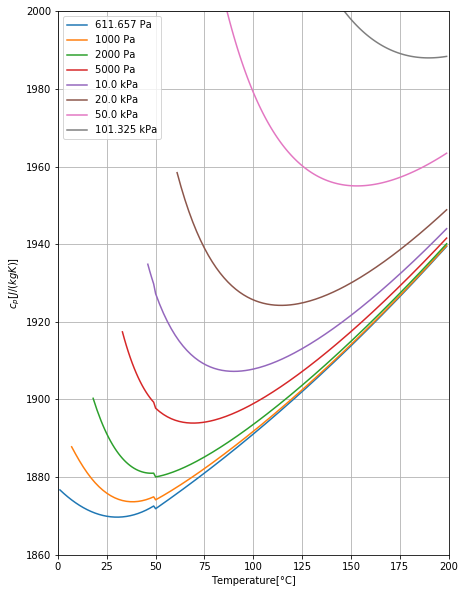

In [3]:
temp = np.arange(0, 200, 1)
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111)
for pp in [ss.watertriplepointpress, 1000, 2000, 5000, 10000, 20000, 50000, 101325]:
    seltemp = temp[temp >= ss.saturated_vapour_temperature(pp)]
    ax.plot(seltemp, ss.specific_heat_constant_pressure_vapour(pp, seltemp), label=str(pp) + ' Pa' if pp<10000 else str(pp/1000) + ' kPa')
plt.grid(True)
plt.ylim(1860, 2000)
plt.xlim(0, 200)
ax.legend()
plt.xlabel('Temperature[°C]')
plt.ylabel('$c_p[J/(kg K)]$')
plt.show()

Test saturated vapour routines

In [4]:
test = np.array([ss.watertriplepointpress, 1000, 2000, 5000, 10000, 20000, 50000, 101325])
np.testing.assert_almost_equal(ss.saturated_vapour_pressure(ss.saturated_vapour_temperature(test)), test, decimal=7, err_msg='Comparison Failed!', verbose=True)

Test absolute humidity routine by reproducing the graph from [StackExchange](https://earthscience.stackexchange.com/questions/13511/how-would-i-use-data-to-find-specific-humidity-and-mixing-ratio)

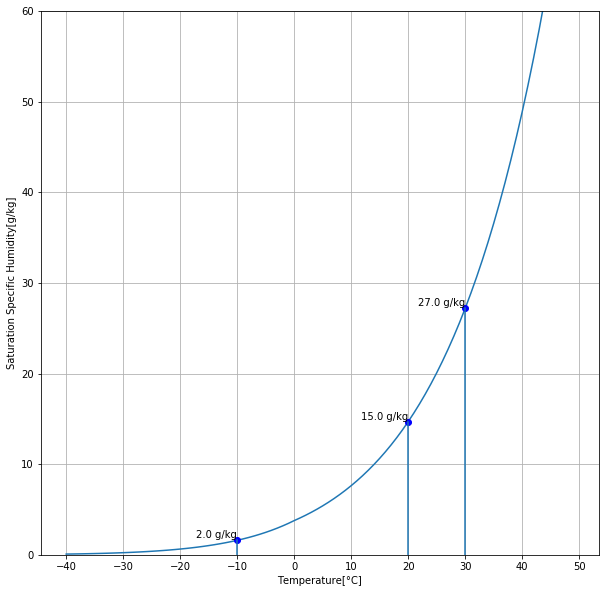

In [5]:
temp = np.arange(-40,50, 1)
plt.figure(figsize=(10,10))
plt.plot(temp, ss.specific_humidity(temp, 101325, 1.0)*1000)
plt.xlabel('Temperature[°C]')
plt.ylabel('Saturation Specific Humidity[g/kg]')
plt.ylim(0, 60)
plt.xticks(np.arange(-40, 60, step=10))
plt.grid(True)
tmp = -10
shum = ss.specific_humidity(tmp, 101325, 1.0)*1000
plt.plot(tmp,shum,'bo')
plt.axvline(x=tmp, ymin=0, ymax=shum/60)
plt.text(tmp,shum,str(round(shum))+' g/kg',horizontalalignment='right',verticalalignment='bottom')
tmp = +20
shum = ss.specific_humidity(tmp, 101325, 1.0)*1000
plt.plot(tmp,shum,'bo')
plt.axvline(x=tmp, ymin=0, ymax=shum/60)
plt.text(tmp,shum,str(round(shum))+' g/kg',horizontalalignment='right',verticalalignment='bottom')
tmp = +30
shum = ss.specific_humidity(tmp, 101325, 1.0)*1000
plt.plot(tmp,shum,'bo') 
plt.axvline(x=tmp, ymin=0, ymax=shum/60)
plt.text(tmp,shum,str(round(shum))+' g/kg',horizontalalignment='right',verticalalignment='bottom')
plt.show()

Test speed of sound in the different approximations

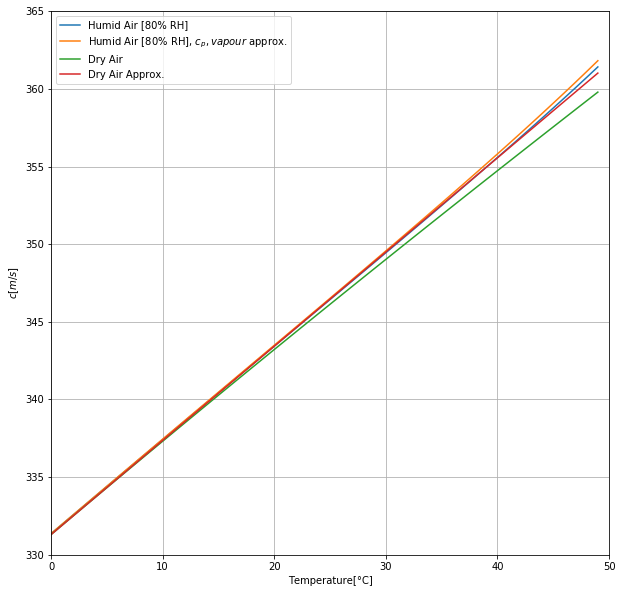

In [12]:
temp = np.arange(0, 50, 1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
labels = ['Humid Air [80% RH]', 'Humid Air [80% RH], $c_p,vapour$ approx.', 'Dry Air', 'Dry Air Approx.']
for approx in np.arange(4):
    ax.plot(temp, ss.speed_of_sound(temp, 101325, 0.8, approx=approx), label=labels[approx])
plt.grid(True)
plt.ylim(330,365)
plt.xlim(0, 50)
ax.legend()
plt.xlabel('Temperature[°C]')
plt.ylabel('$c [m/s]$')
plt.show()

We see that for moderate temperatures the differences are all of 2nd order